In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd

df = yf.download ('AAPL', start='2012-01-01', end='2025-06-18')
df.head()

C:\Users\souhr\AppData\Local\Temp\ipykernel_19852\4150823722.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download ('AAPL', start='2012-01-01', end='2025-06-18')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.359183,12.397353,12.292163,12.304185,302220800
2012-01-04,12.425603,12.462871,12.300578,12.322217,260022000
2012-01-05,12.563552,12.579180,12.402461,12.470985,271269600
2012-01-06,12.694887,12.705406,12.599315,12.615845,318292800
2012-01-09,12.674749,12.855676,12.663329,12.788054,394024400


In [2]:
data = df[['Close']].copy()
data.head()

Price,Close
Ticker,AAPL
Date,
2012-01-03,12.359183
2012-01-04,12.425603
2012-01-05,12.563552
2012-01-06,12.694887
2012-01-09,12.674749


In [3]:
data.isnull().sum()

Price  Ticker
Close  AAPL      0
dtype: int64

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [5]:
import numpy as np 

window_size = 60

X = []
y = []

for i in range(window_size,len(scaled_data)):
    X.append(scaled_data[i - window_size:i,0])
    y.append(scaled_data[i,0])

X = np.array(X)
y = np.array(y)

print("X shape: ",X.shape)
print("y shape: ",y.shape)

X shape:  (3324, 60)
y shape:  (3324,)


In [6]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print("X shape: ",X.shape)

X shape:  (3324, 60, 1)


In [7]:
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1)) 

model.compile(optimizer='adam', loss='mean_squared_error')


D:\jupyter\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - loss: 0.0161 - val_loss: 0.0026
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 9.7308e-04 - val_loss: 9.2094e-04
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 7.9638e-04 - val_loss: 9.5385e-04
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 8.2976e-04 - val_loss: 0.0025
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 7.2495e-04 - val_loss: 8.4094e-04
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 6.1559e-04 - val_loss: 0.0041
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 7.0238e-04 - val_loss: 8.1556e-04
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 7.2552e-04 - val_loss: 7.7574e-04
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 5.2272e-04 - val_loss: 0.0012
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 6.0677e-04 - val_loss: 0.0012
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 5.2474e-04 - val_loss: 7.8140e-0

In [10]:
predictions = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [11]:
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

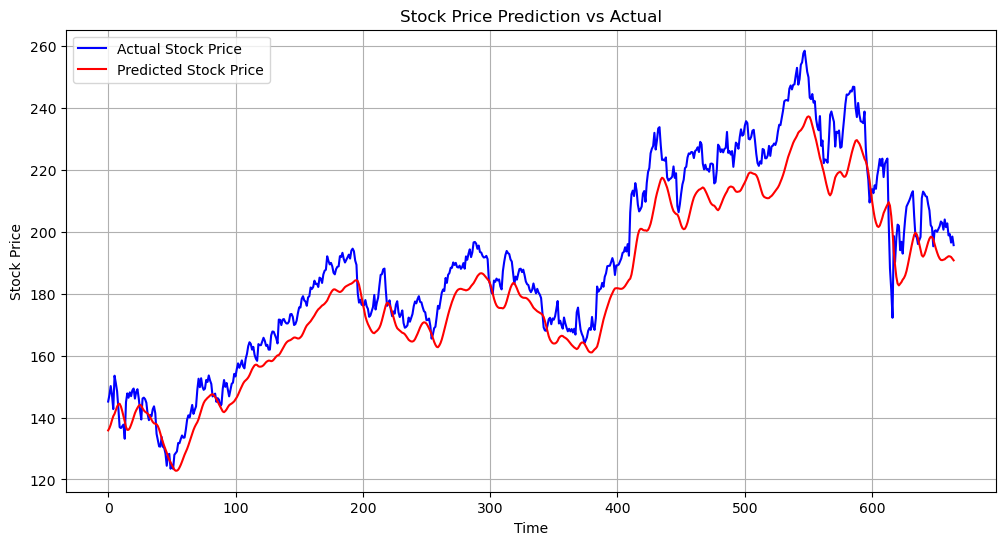

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
model.save('stock_lstm_model.h5')

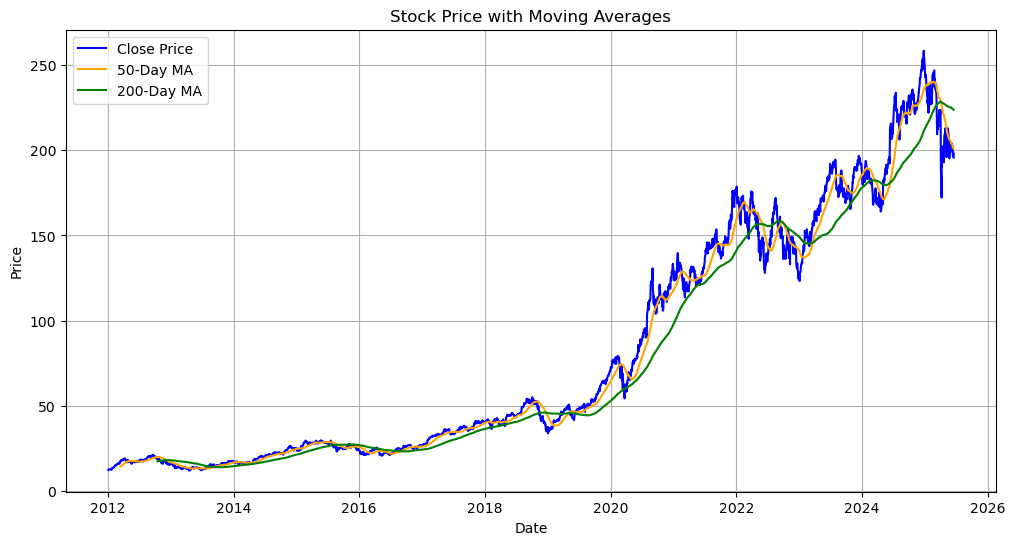

In [14]:
data_ma = df[['Close']].copy()

data_ma['MA_50'] = data_ma['Close'].rolling(window=50).mean()
data_ma['MA_200'] = data_ma['Close'].rolling(window=200).mean()


plt.figure(figsize=(12, 6))
plt.plot(data_ma['Close'], label='Close Price', color='blue')
plt.plot(data_ma['MA_50'], label='50-Day MA', color='orange')
plt.plot(data_ma['MA_200'], label='200-Day MA', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


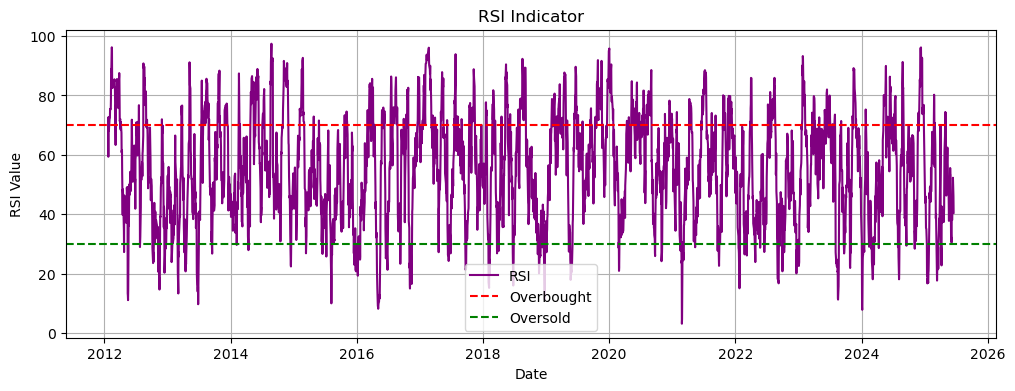

In [15]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

data_ma['RSI'] = compute_rsi(data_ma['Close'])

plt.figure(figsize=(12, 4))
plt.plot(data_ma['RSI'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()